## [Problem 1] Understanding the content of the competition


### Company Overview

Home Credit is a company that aims to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience.

They specialize in offering loans to individuals with insufficient or non-existent credit histories, who may otherwise struggle to obtain loans from traditional financial institutions.

### Competition Expectations

The competition challenges participants to leverage alternative data sources, including telco and transactional information, to predict the repayment abilities of Home Credit's clients.

Home Credit is already using statistical and machine learning methods for these predictions, but they seek to unlock the full potential of their data through collaboration with Kagglers.

### Benefits of Predicting Default Risk

By accurately predicting clients' repayment abilities, Home Credit can ensure that deserving clients are not rejected for loans.
Additionally, predicting default risk allows Home Credit to tailor loan terms (such as principal, maturity, and repayment calendar) to empower their clients to be successful borrowers.

Overall, the goal is to minimize default rates, optimize lending decisions, and enhance the borrowing experience for Home Credit's clients.


## [Problem 2] Understanding the overview of data
To get an overview of your data, do the following:

Use .head() , .info() , describe() , etc.​ ​
Check for missing values
Draw a graph showing the percentage of classes
Please explain and discuss each result.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./application_train.csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


From above:


Dataframe Size: Consists of 307,511 rows and 122 columns. 

The index of the dataframe ranges from 0 to 307,510.

Column Data Types:

float64: There are 65 columns with floating-point numeric data types.

int64: There are 41 columns with integer numeric data types.

object: There are 16 columns with object data types, typically indicating categorical or string data.

In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
data.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print the result
missing_percentage


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

SK_ID_CURR                       0.000000

TARGET                           0.000000

NAME_CONTRACT_TYPE               0.000000

CODE_GENDER                      0.000000

FLAG_OWN_CAR                     0.000000

FLAG_OWN_REALTY                  0.000000

CNT_CHILDREN                     0.000000

AMT_INCOME_TOTAL                 0.000000

AMT_CREDIT                       0.000000

AMT_ANNUITY                      0.003902

AMT_GOODS_PRICE                  0.090403

NAME_TYPE_SUITE                  0.420148

NAME_INCOME_TYPE                 0.000000

NAME_EDUCATION_TYPE              0.000000

NAME_FAMILY_STATUS               0.000000

NAME_HOUSING_TYPE                0.000000

REGION_POPULATION_RELATIVE       0.000000

DAYS_BIRTH                       0.000000

DAYS_EMPLOYED                    0.000000

DAYS_REGISTRATION                0.000000

DAYS_ID_PUBLISH                  0.000000

OWN_CAR_AGE                     65.990810

FLAG_MOBIL                       0.000000

FLAG_EMP_PHONE                   0.000000

FLAG_WORK_PHONE                  0.000000

FLAG_CONT_MOBILE                 0.000000

FLAG_PHONE                       0.000000

FLAG_EMAIL                       0.000000

OCCUPATION_TYPE                 31.345545

CNT_FAM_MEMBERS                  0.000650

REGION_RATING_CLIENT             0.000000

REGION_RATING_CLIENT_W_CITY      0.000000

WEEKDAY_APPR_PROCESS_START       0.000000

HOUR_APPR_PROCESS_START          0.000000

REG_REGION_NOT_LIVE_REGION       0.000000

REG_REGION_NOT_WORK_REGION       0.000000

LIVE_REGION_NOT_WORK_REGION      0.000000

REG_CITY_NOT_LIVE_CITY           0.000000

REG_CITY_NOT_WORK_CITY           0.000000

LIVE_CITY_NOT_WORK_CITY          0.000000


ORGANIZATION_TYPE                0.000000

EXT_SOURCE_1                    56.381073


EXT_SOURCE_2                     0.214626

EXT_SOURCE_3                    19.825307

APARTMENTS_AVG                  50.749729

BASEMENTAREA_AVG                58.515956

YEARS_BEGINEXPLUATATION_AVG     48.781019

YEARS_BUILD_AVG                 66.497784

COMMONAREA_AVG                  69.872297

ELEVATORS_AVG                   53.295980

ENTRANCES_AVG                   50.348768

FLOORSMAX_AVG                   49.760822

FLOORSMIN_AVG                   67.848630

LANDAREA_AVG                    59.376738

LIVINGAPARTMENTS_AVG            68.354953

LIVINGAREA_AVG                  50.193326

NONLIVINGAPARTMENTS_AVG         69.432963

NONLIVINGAREA_AVG               55.179164

APARTMENTS_MODE                 50.749729

BASEMENTAREA_MODE               58.515956

YEARS_BEGINEXPLUATATION_MODE    48.781019

YEARS_BUILD_MODE                66.497784

COMMONAREA_MODE                 69.872297

ELEVATORS_MODE                  53.295980

ENTRANCES_MODE                  50.348768

FLOORSMAX_MODE                  49.760822

FLOORSMIN_MODE                  67.848630

LANDAREA_MODE                   59.376738

LIVINGAPARTMENTS_MODE           68.354953

LIVINGAREA_MODE                 50.193326

NONLIVINGAPARTMENTS_MODE        69.432963

NONLIVINGAREA_MODE              55.179164

APARTMENTS_MEDI                 50.749729

BASEMENTAREA_MEDI               58.515956

YEARS_BEGINEXPLUATATION_MEDI    48.781019

YEARS_BUILD_MEDI                66.497784

COMMONAREA_MEDI                 69.872297

ELEVATORS_MEDI                  53.295980

ENTRANCES_MEDI                  50.348768

FLOORSMAX_MEDI                  49.760822

FLOORSMIN_MEDI                  67.848630

LANDAREA_MEDI                   59.376738

LIVINGAPARTMENTS_MEDI           68.354953

LIVINGAREA_MEDI                 50.193326

NONLIVINGAPARTMENTS_MEDI        69.432963

NONLIVINGAREA_MEDI              55.179164

FONDKAPREMONT_MODE              68.386172

HOUSETYPE_MODE                  50.176091

TOTALAREA_MODE                  48.268517

WALLSMATERIAL_MODE              50.840783

EMERGENCYSTATE_MODE             47.398304

OBS_30_CNT_SOCIAL_CIRCLE         0.332021

DEF_30_CNT_SOCIAL_CIRCLE         0.332021

OBS_60_CNT_SOCIAL_CIRCLE         0.332021

DEF_60_CNT_SOCIAL_CIRCLE         0.332021

DAYS_LAST_PHONE_CHANGE           0.000325

FLAG_DOCUMENT_2                  0.000000

FLAG_DOCUMENT_3                  0.000000

FLAG_DOCUMENT_4                  0.000000

FLAG_DOCUMENT_5                  0.000000

FLAG_DOCUMENT_6                  0.000000

FLAG_DOCUMENT_7                  0.000000

FLAG_DOCUMENT_8                  0.000000

FLAG_DOCUMENT_9                  0.000000

FLAG_DOCUMENT_10                 0.000000

FLAG_DOCUMENT_11                 0.000000

FLAG_DOCUMENT_12                 0.000000

FLAG_DOCUMENT_13                 0.000000

FLAG_DOCUMENT_14                 0.000000

FLAG_DOCUMENT_15                 0.000000

FLAG_DOCUMENT_16                 0.000000

FLAG_DOCUMENT_17                 0.000000

FLAG_DOCUMENT_18                 0.000000

FLAG_DOCUMENT_19                 0.000000

FLAG_DOCUMENT_20                 0.000000

FLAG_DOCUMENT_21                 0.000000

AMT_REQ_CREDIT_BUREAU_HOUR      13.501631

AMT_REQ_CREDIT_BUREAU_DAY       13.501631

AMT_REQ_CREDIT_BUREAU_WEEK      13.501631

AMT_REQ_CREDIT_BUREAU_MON       13.501631

AMT_REQ_CREDIT_BUREAU_QRT       13.501631

AMT_REQ_CREDIT_BUREAU_YEAR      13.501631

dtype: float64

Dealing with missing values

In [9]:
# Calculate the percentage of missing values for each column
# missing_percentages = df.isnull().mean() * 100

# Identify columns with 10% or greater missing values
columns_to_drop = missing_percentage[missing_percentage >= 10].index

# Drop the identified columns from the DataFrame
df_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Display the new DataFrame
print(df_cleaned.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [10]:
from sklearn.impute import SimpleImputer

# Identify columns with less than 10% missing values
columns_to_impute = missing_percentage[missing_percentage < 10].index

# Separate columns into numeric and categorical
numeric_columns = df_cleaned[columns_to_impute].select_dtypes(include=['number']).columns
categorical_columns = df_cleaned[columns_to_impute].select_dtypes(exclude=['number']).columns

# Impute numeric columns with mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
df_cleaned[numeric_columns] = numeric_imputer.fit_transform(df_cleaned[numeric_columns])

# Impute categorical columns with most frequent strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_columns] = categorical_imputer.fit_transform(df_cleaned[categorical_columns])

# Display the new DataFrame with imputed values
df_cleaned.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_cleaned.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

TARGET: is the target variable, indicating whether an individual defaulted on a loan or not (1 for default, 0 for no default).

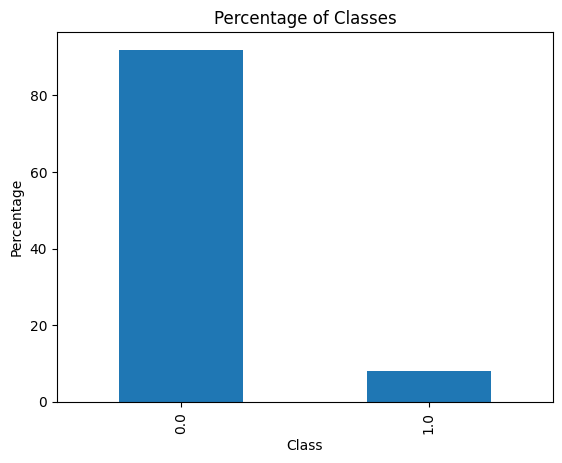

In [12]:

import matplotlib.pyplot as plt

class_counts = df_cleaned['TARGET'].value_counts(normalize=True) * 100
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Classes')
plt.show()


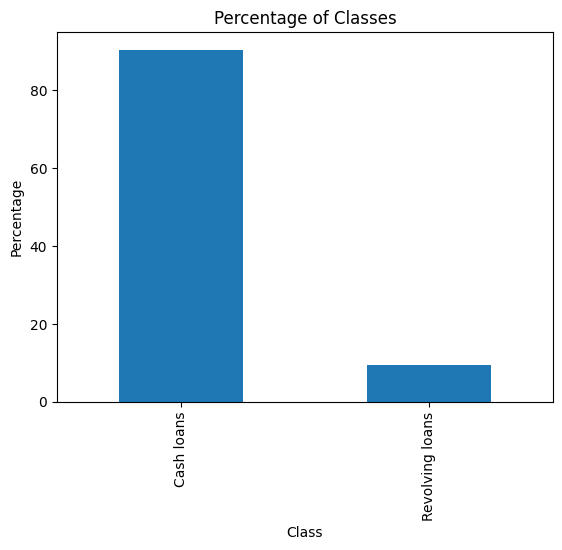

In [13]:
class_counts = df_cleaned['NAME_CONTRACT_TYPE'].value_counts(normalize=True) * 100
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Classes')
plt.show()

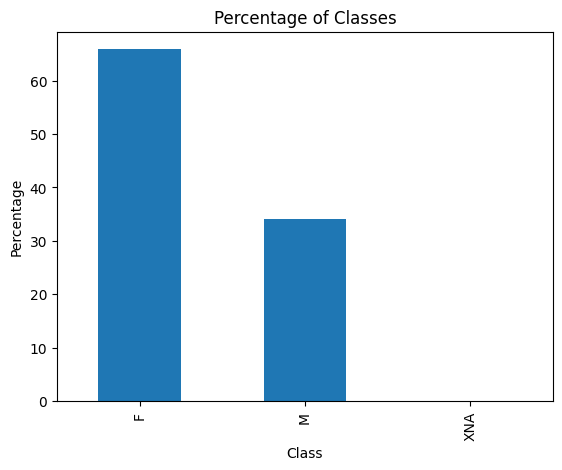

In [14]:
class_counts = df_cleaned['CODE_GENDER'].value_counts(normalize=True) * 100
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Classes')
plt.show()

## [Problem 3] Defining issues
Please set multiple issues / questions of your own based on the overview of the data.

1. Are there any patterns or correlations between the target variable (TARGET) and other features in the dataset? For example, does the likelihood of default vary based on the type of loan, income level, or gender?
2. What is the distribution of income levels among loan applicants? Are there any significant differences in income distribution between those who default and those who don't?
3. How does the frequency of past credit inquiries (AMT_REQ_CREDIT_BUREAU_YEAR) relate to the likelihood of default? Are there any thresholds beyond which the number of inquiries significantly impacts default rates?
4. What are the most common types of housing among loan applicants? Does the type of housing correlate with default rates?
5. How do age and employment duration (DAYS_BIRTH and DAYS_EMPLOYED) influence the likelihood of default? Are there any age groups or employment tenures that exhibit higher default rates?
6. Is there any relationship between the amount of credit requested (AMT_CREDIT) and the probability of default? Do applicants requesting higher amounts tend to default more often?
7. Are there any regional differences in default rates? How does the population density of the applicant's region (REGION_POPULATION_RELATIVE) relate to default rates?
8. What is the distribution of the number of children (CNT_CHILDREN) among loan applicants? Does having more children correlate with a higher likelihood of default?
9. Are there any significant differences in default rates between different types of income sources (NAME_INCOME_TYPE) or education levels (NAME_EDUCATION_TYPE)?
10. How does the presence of certain documents (FLAG_DOCUMENT_X) correlate with the likelihood of default? For example, do applicants who provide more documents tend to default less frequently?

## [Problem 4] Data exploration
We will proceed with the data search to solve assignment and questions set in Problem 3. Create at least 5 tables and graphs to use in your search, along with your thoughts.

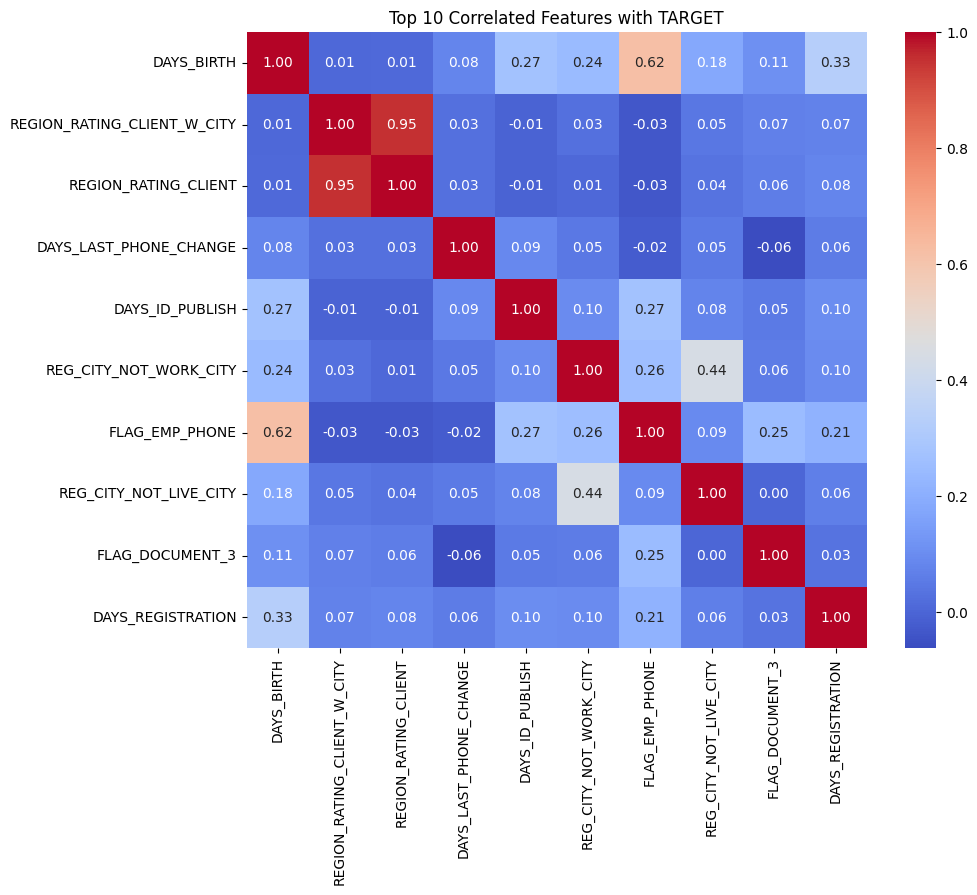

In [16]:
import seaborn as sns


# Let's select only numeric columns for the correlation matrix
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix with the target variable (TARGET)
correlation_matrix = numeric_columns.corr()

# Get the top 10 most correlated features with the target variable
top_10_features = correlation_matrix['TARGET'].sort_values(ascending=False).head(11)  # Including the target variable itself

# Select the top 10 features (excluding the target variable)
top_10_features = top_10_features.iloc[1:]

# Select only the top 10 features from the correlation matrix
top_10_corr_matrix = correlation_matrix.loc[top_10_features.index, top_10_features.index]

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Correlated Features with TARGET')
plt.show()


There is high correlation between DAYS_BIRTH and FLAG_EMP_PHONE

There is high correlation between REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT

There is high correlation between REG_CITY_NOT_WORK_CITY and REG_CITY_NOT_LIVE_CITY


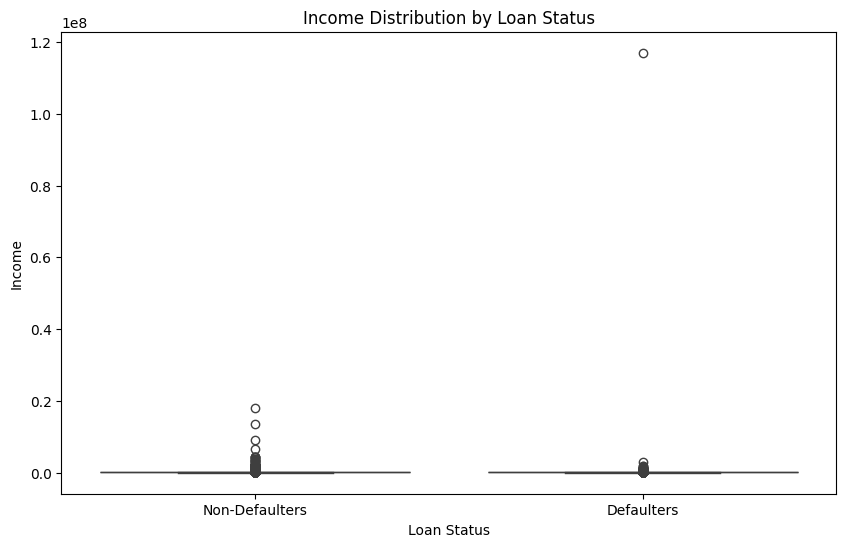

In [19]:
# Filter the DataFrame based on loan status (default vs. non-default)
defaulters = df_cleaned[df_cleaned['TARGET'] == 1]
non_defaulters = df_cleaned[df_cleaned['TARGET'] == 0]

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot boxplots for income distribution of defaulters and non-defaulters
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_cleaned)
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])

# Show the plot
plt.show()


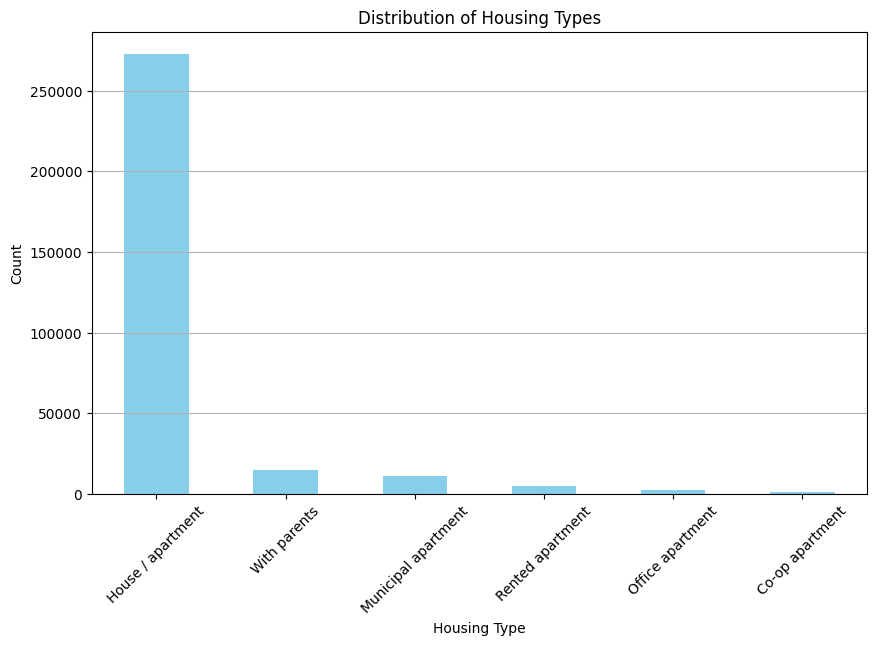

In [21]:
# Count the occurrences of each housing type
housing_counts = df_cleaned['NAME_HOUSING_TYPE'].value_counts()

# Plotting the distribution of housing types using a bar chart
plt.figure(figsize=(10, 6))
housing_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Housing Types')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


House / apartment has the highest number of housing types while the Co-op apartment housing type has the least number.

## [Problem 5] (Advanced task) Posting to Notebooks
Although not required, we encourage you to post your EDA notebook on the Notebooks page of the competition.